# Повышение эффективности моделей

Задание: Решить задачу с идентификацией краж в магазинах (данные практики 2) или альтернативные варианты приведенные ниже методами k-NN, SVM, Naive Bayes, C4.5/C5.0 и провести оценку качества. Выполнить кроссвалидацию и сравнить качество получаемых результатов с результатами, полученными на предыдущем этапе. Построить композицию моделей и сравнить качество модели с предыдущими результатами.

Выполним задание на уже знакомых данных DataSet2_1.csv

**DataSet2_1** – Данные о кражах в магазинах самообслуживания (задача классификации)

*trustLevel* - Индивидуальный уровень доверия клиента. 6: Высочайшая надежность

*totalScanTimeInSeconds* - Общее время в секундах между первым и последним отсканированным продуктом

*grandTotal* - Общая стоимость отсканированных продуктов

*lineItemVoids* - Количество аннулированных сканирований

*scansWithoutRegistration* - Количество попыток сканирования без какого-либо сканирования (неудачное сканирование)

*quantityModification* - Число изменений количества товаров для одного из сканируемых продуктов

*scannedLineItemsPerSecond* - Среднее количество отсканированных продуктов в секунду

*valuePerSecond* - Средняя общая стоимость отсканированных продуктов в секунду

*lineItemVoidsPerPosition* - Отношение числа аннулированных сканирований к общему числу аннулированных и не аннулированных сканирований

*fraud* - Классификатор как мошенничество (1) или не мошенничество (0)

Данные для работы можно найти здесь: https://goo.su/Xx1I

Для начала выполним классификацию с использованием известных нам моделей + используем несколько новых классификаторов, таких как наивный Байесовский классификатор и классификатор с помощью дерева решений(на R этот метод называется C5). С классификаторами kNN, SVM мы уже знакомы.

### Несколько слов о Наивном Байесовском классификаторе:

Наивный байесовский классификатор — один из простейших алгоритмов классификации, основанный на применении теоремы Байеса с сильным наивным предположением об условной независимости. Хотя в настоящее время это уже не самая современная классификационная модель, ее математика проста и элегантна. Предполагается, что все функции в X взаимно независимы и зависят от y.

[Подробно читайте тут](https://academy.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii)
[Ещё тут](https://labelme.medium.com/%D0%BD%D0%B0%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9-%D0%B1%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9-%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80-naive-bayes-classifier-b939578f6e3b)


### Несколько слов о деревьях решений:

Дерево решений — классификатор, построенный на основе решающих правил вида «если, то», упорядоченных в древовидную иерархическую структуру.

В основе работы дерева решений лежит процесс рекурсивного разбиения исходного множества объектов на подмножества, ассоциированные с предварительно заданными классами. Разбиение производится с помощью решающих правил, в которых осуществляется проверка значений атрибутов по заданному условию.

[Подробно читайте тут](https://academy.yandex.ru/handbook/ml/article/reshayushchiye-derevya)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

import matplotlib.pyplot as plt

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

**About Dataset**

Annual CDC survey data of 400k adults related to their health status:
The original dataset of nearly 300 variables was reduced to just about18 variables.

In addition to classical EDA, this dataset can be used toapply a range of machine learning methods, most notably classifiermodels (Logistic Regression, SVM, KNN, XgBoost, AdaBoost, Decision Tree, Random Forest,ET, ANN etc.). You should treat the variable "HeartDisease" as a binary ("Yes" - respondent had heart disease; "No"- respondent had no heart disease). But classes are not balanced, So the classic model application approach is not advisable.

Fixing the weights/undersampling should yield significantly betters
results. Based on the dataset, Can you indicate which variables have a significant effect on the likelihood of heart disease? Let’s do analysis .The dataset contains 18 variables (9 booleans, 5 strings and 4 decimals).In machine learning projects, "HeartDisease" can be used as the explonatory variable, but note that the classes are heavily unbalanced.

[Learn more here](https://www.kaggle.com/datasets/mdimran6666/heart-disease-nowadays).

In [ ]:
data = pd.read_csv('/content/Heart Disease.csv', sep=',')
data = data.iloc[:1000]
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No,28.29,Yes,No,No,10,20,No,Female,65-69,Black,Yes,Yes,Fair,8,No,No,No
996,No,25.69,Yes,No,No,0,0,No,Female,75-79,White,No,Yes,Excellent,8,No,No,No
997,Yes,26.99,No,No,No,1,0,No,Male,70-74,White,No,Yes,Very good,8,No,No,No
998,No,44.29,No,No,No,30,0,Yes,Female,70-74,White,Yes,No,Good,6,Yes,No,No


In [ ]:
data['HeartDisease'].value_counts()

,count
HeartDisease,
No,849
Yes,151


In [ ]:
data = data.dropna()
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No,28.29,Yes,No,No,10,20,No,Female,65-69,Black,Yes,Yes,Fair,8,No,No,No
996,No,25.69,Yes,No,No,0,0,No,Female,75-79,White,No,Yes,Excellent,8,No,No,No
997,Yes,26.99,No,No,No,1,0,No,Male,70-74,White,No,Yes,Very good,8,No,No,No
998,No,44.29,No,No,No,30,0,Yes,Female,70-74,White,Yes,No,Good,6,Yes,No,No


In [ ]:
le = LabelEncoder()

columns_to_encode = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                     'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

for column in columns_to_encode:
    data[column] = le.fit_transform(data[column])

In [ ]:
data = pd.get_dummies(data, drop_first=True).astype(int)

In [ ]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16,1,0,0,3,30,0,0,2,...,0,0,0,0,0,1,0,0,0,1
1,0,20,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,0,26,1,0,0,20,30,0,1,2,...,0,0,0,0,0,1,1,0,0,0
3,0,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,23,0,0,0,28,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,28,1,0,0,10,20,0,0,2,...,0,0,1,0,0,0,1,0,0,0
996,0,25,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
997,1,26,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
998,0,44,0,0,0,30,0,1,0,2,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
data['HeartDisease'].value_counts()

,count
HeartDisease,
0,849
1,151


In [ ]:
# разбиваем данные на тренировочную и тестовую выборку
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
y_test.value_counts()

,count
HeartDisease,
0,163
1,37


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
res_knn = knn_model.predict(X_test)

svm_model = SVC(probability=True, kernel="linear")
svm_model.fit(X_train, y_train)
res_svm = svm_model.predict(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
res_nb = nb_model.predict(X_test)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
res_dt = dt_model.predict(X_test)

Оценим качество предсказаний, посчитав accuracy и построив ROC-кривую

Доля правильных ответов:
        kNN:0.785
        SVM:0.815
        Naive Bayes:0.29
        Decision Tree:0.75
        


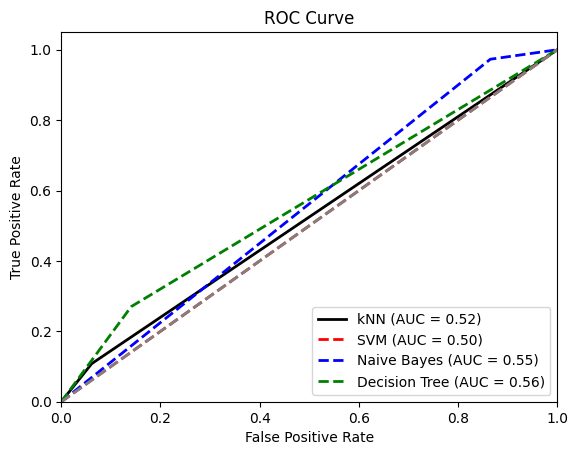

In [ ]:
#вычисление доли правильных ответов
knn_acc = accuracy_score(y_test, res_knn)
svm_acc = accuracy_score(y_test, res_svm)
nb_acc = accuracy_score(y_test, res_nb)
dt_acc = accuracy_score(y_test, res_dt)

# Вычисление ROC-кривых
fpr_knn, tpr_knn, _ = roc_curve(y_test, res_knn)
fpr_svm, tpr_svm, _ = roc_curve(y_test, res_svm)
fpr_nb, tpr_nb, _ = roc_curve(y_test, res_nb)
fpr_dt, tpr_dt, _ = roc_curve(y_test, res_dt)

# Рассчитать площадь под ROC-кривой (AUC-ROC)
auc_knn = roc_auc_score(y_test, res_knn)
auc_svm = roc_auc_score(y_test, res_svm)
auc_nb = roc_auc_score(y_test, res_nb)
auc_dt = roc_auc_score(y_test, res_dt)

print(f'''Доля правильных ответов:
        kNN:{knn_acc}
        SVM:{svm_acc}
        Naive Bayes:{nb_acc}
        Decision Tree:{dt_acc}
        ''')

# Визуализировать ROC-кривую
plt.plot(fpr_knn, tpr_knn, color='black', lw=2, label=f'kNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, linestyle='--', label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, linestyle='--', label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, linestyle='--', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

В машинном обучении, особенно в контексте классификации, методы predict и predict_proba имеют разные назначения и возвращают различный тип информации.

1. **Метод predict:**
Этот метод используется для получения окончательных предсказаний классов. Он возвращает дискретные значения, которые представляют собой предсказанные классы для каждого экземпляра в тестовом наборе. Например, если у вас есть бинарная классификация, predict вернет 0 или 1 в зависимости от того, к какому классу принадлежит экземпляр.
2. **Метод predict_proba:**
Этот метод возвращает вероятности принадлежности каждого экземпляра к каждому из классов. Для бинарной классификации он вернет два значения: вероятность принадлежности к классу 0 и вероятность принадлежности к классу 1. Эти вероятности могут быть использованы для более тонкой настройки порога классификации, что позволяет лучше управлять балансом между истинными положительными и ложными положительными результатами.

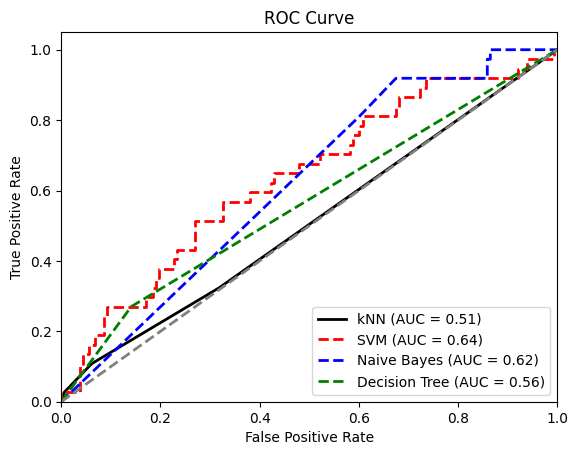

In [ ]:
# предскажем вероятности классов
res_knn_proba = knn_model.predict_proba(X_test)[:, 1]
res_svm_proba = svm_model.predict_proba(X_test)[:, 1]
res_nb_proba = nb_model.predict_proba(X_test)[:, 1]
res_dt_proba = dt_model.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривых
fpr_knn, tpr_knn, _ = roc_curve(y_test, res_knn_proba )
fpr_svm, tpr_svm, _ = roc_curve(y_test, res_svm_proba )
fpr_nb, tpr_nb, _ = roc_curve(y_test, res_nb_proba )
fpr_dt, tpr_dt, _ = roc_curve(y_test, res_dt_proba )

# Рассчитать площадь под ROC-кривой (AUC-ROC)
auc_knn_proba  = roc_auc_score(y_test, res_knn_proba )
auc_svm_proba  = roc_auc_score(y_test, res_svm_proba )
auc_nb_proba  = roc_auc_score(y_test, res_nb_proba )
auc_dt_proba  = roc_auc_score(y_test, res_dt_proba )

# Визуализировать ROC-кривую
plt.plot(fpr_knn, tpr_knn, color='black', lw=2, label=f'kNN (AUC = {auc_knn_proba :.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, linestyle='--', label=f'SVM (AUC = {auc_svm_proba :.2f})')
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, linestyle='--', label=f'Naive Bayes (AUC = {auc_nb_proba :.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, linestyle='--', label=f'Decision Tree (AUC = {auc_dt_proba :.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Кроссвалидация

Кросс-валидация или скользящий контроль — процедура эмпирического оценивания обобщающей способности алгоритмов. С помощью кросс-валидации эмулируется наличие тестовой выборки, которая не участвует в обучении, но для которой известны правильные ответы.
Есть несколько видов кросс-валидации, почитать об этом можно [тут,](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9A%D1%80%D0%BE%D1%81%D1%81-%D0%B2%D0%B0%D0%BB%D0%B8%D0%B4%D0%B0%D1%86%D0%B8%D1%8F)
[а ещё тут](https://academy.yandex.ru/handbook/ml/article/kross-validaciya)


#### K-fold

k-кратная кросс-валидация (k-fold) - это когда набор данных случайным образом разбивается на группы k раз. Одна из групп используется в качестве тестового набора, а остальные — в качестве обучающего набора. Модель обучается на обучающем наборе и оценивается на тестовом наборе. Затем процесс повторяется до тех пор, пока каждая уникальная группа не будет использоваться в качестве тестового набора.

Например, для 5-кратной перекрестной проверки набор данных будет разделен на 5 групп, а модель будет обучена и протестирована 5 отдельных раз, чтобы каждая группа получила шанс стать тестовым набором. Это можно увидеть на графике ниже.


[Источник](https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a#:~:text=Cross%2Dvalidation%20is%20when%20the,used%20as%20the%20test%20set.)

Кстати, метод разделения на тестовую и тренировочную выборки, который мы использовали ранее, называется "Hold-out".

Кросс-валидация лучше, чем использование метода hold-out, поскольку оценка метода hold-out зависит от того, как данные разделены на обучающий и тестовый наборы. Кросс-валидация дает модели возможность протестировать несколько разбиений, чтобы мы могли получить лучшее представление о том, как модель будет работать на различных данных.

Мы воспользуемся функцией из библиотеки scikit-learn cross_val_score, которая используется для выполнения кросс-валидированного прогноза (предсказания) модели на данных. Она выполняет оценку модели на каждом фолде кросс-валидации и возвращает массив с прогнозами для каждого объекта данных.

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

knn_model_cv = KNeighborsClassifier(n_neighbors=3)
knn_cv_scores = cross_val_score(knn_model_cv, X, y, cv=5)
print('--------------kNN---------------')
print(knn_cv_scores)
print(f'kNN cv_scores mean:{np.mean(knn_cv_scores)}')

svm_model_cv = SVC(probability=True, kernel="linear")
svm_cv_scores = cross_val_score(svm_model_cv, X, y, cv=5)
print('--------------SVM---------------')
print(svm_cv_scores)
print(f'SVM cv_scores mean:{np.mean(svm_cv_scores)}')

nb_model_cv = GaussianNB()
nb_cv_scores = cross_val_score(nb_model_cv, X, y, cv=5)
print('-----------Naive Bayes------------')
print(nb_cv_scores)
print(f'Naive Bayes cv_scores mean:{np.mean(nb_cv_scores)}')

dt_model_cv = DecisionTreeClassifier()
dt_cv_scores = cross_val_score(dt_model_cv, X, y, cv=5)
print('----------Decision Tree----------')
print(dt_cv_scores)
print(f'Decision tree cv_scores mean:{np.mean(dt_cv_scores)}')

--------------kNN---------------
[0.8  0.82 0.82 0.82 0.81]
kNN cv_scores mean:0.8140000000000001
--------------SVM---------------
[0.85  0.85  0.85  0.85  0.845]
SVM cv_scores mean:0.849
-----------Naive Bayes------------
[0.215 0.295 0.23  0.23  0.27 ]
Naive Bayes cv_scores mean:0.248
----------Decision Tree----------
[0.78  0.765 0.765 0.73  0.79 ]
Decision tree cv_scores mean:0.766


Также кросс-валидация может быть использована для подбора гиперпараметров модели.
Например, для kNN классификатора не очевидно, сколько именно ближайших соседей выбрать для наилучшей работы классификатора.

Ответ на этот вопрос поможет найти кросс-валидация:

При построении нашей первоначальной модели k-NN мы установили параметр n_neighbors равным 3 в качестве отправной точки без какой-либо реальной логики в этом выборе.
Мы воспользуемся GridSearchCV, чтобы найти оптимальное значение для n_neighbours.

GridSearchCV работает путем многократного обучения нашей модели по заданному нами диапазону параметров. Таким образом, мы можем протестировать нашу модель с каждым параметром и определить оптимальные значения, чтобы получить результаты с максимальной точностью.

Для нашей модели мы укажем диапазон значений n_neighbors, чтобы увидеть, какое значение лучше всего подходит для нашей модели. Для этого мы создадим словарь, установив в качестве ключа «n_neighbors» и используя numpy для создания массива значений от 1 до 20.

In [ ]:
from sklearn.model_selection import GridSearchCV

knn_model_2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 21)}
knn_gscv = GridSearchCV(knn_model_2, param_grid, cv=5)
knn_gscv.fit(X, y)
# проверим, какой параметр оказался наилучшим
print('Наилучшее колическтво соседей:', knn_gscv.best_params_)
print('Наилучшая accuracy:', knn_gscv.best_score_)

Наилучшее колическтво соседей: {'n_neighbors': 12}
Наилучшая accuracy: 0.85


#### StratifiedKFold

Подходит для несбалансированных классов, чтобы сохранить пропорции.

In [ ]:
from sklearn.model_selection import StratifiedKFold


cv = StratifiedKFold(n_splits=10)

knn_model_cv = KNeighborsClassifier(n_neighbors=3)
knn_cv_scores = cross_val_score(knn_model_cv, X, y, cv=cv)
print('--------------kNN---------------')
print(knn_cv_scores)
print(f'kNN cv_scores mean:{np.mean(knn_cv_scores)}')

svm_model_cv = SVC(probability=True, kernel="linear")
svm_cv_scores = cross_val_score(svm_model_cv, X, y, cv=cv)
print('--------------SVM---------------')
print(svm_cv_scores)
print(f'SVM cv_scores mean:{np.mean(svm_cv_scores)}')

nb_model_cv = GaussianNB()
nb_cv_scores = cross_val_score(nb_model_cv, X, y, cv=cv)
print('-----------Naive Bayes------------')
print(nb_cv_scores)
print(f'Naive Bayes cv_scores mean:{np.mean(nb_cv_scores)}')

dt_model_cv = DecisionTreeClassifier()
dt_cv_scores = cross_val_score(dt_model_cv, X, y, cv=cv)
print('----------Decision Tree----------')
print(dt_cv_scores)
print(f'Decision tree cv_scores mean:{np.mean(dt_cv_scores)}')

--------------kNN---------------
[0.8  0.82 0.82 0.83 0.81 0.84 0.82 0.85 0.82 0.81]
kNN cv_scores mean:0.8220000000000001
--------------SVM---------------
[0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.84]
SVM cv_scores mean:0.849
-----------Naive Bayes------------
[0.19 0.24 0.28 0.26 0.23 0.23 0.25 0.21 0.26 0.24]
Naive Bayes cv_scores mean:0.23899999999999996
----------Decision Tree----------
[0.78 0.78 0.77 0.76 0.72 0.78 0.82 0.81 0.78 0.81]
Decision tree cv_scores mean:0.781


In [ ]:
from sklearn.model_selection import GridSearchCV

knn_model_2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 21)}
knn_gscv = GridSearchCV(knn_model_2, param_grid, cv=cv)
knn_gscv.fit(X, y)
# проверим, какой параметр оказался наилучшим
print('Наилучшее колическтво соседей:', knn_gscv.best_params_)
print('Наилучшая accuracy:', knn_gscv.best_score_)

Наилучшее колическтво соседей: {'n_neighbors': 19}
Наилучшая accuracy: 0.851


#### ShuffleSplit

Гибко работает с любым размером тестовой выборки и количеством итераций.

In [ ]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

knn_model_cv = KNeighborsClassifier(n_neighbors=3)
knn_cv_scores = cross_val_score(knn_model_cv, X, y, cv=cv)
print('--------------kNN---------------')
print(knn_cv_scores)
print(f'kNN cv_scores mean:{np.mean(knn_cv_scores)}')

svm_model_cv = SVC(probability=True, kernel="linear")
svm_cv_scores = cross_val_score(svm_model_cv, X, y, cv=cv)
print('--------------SVM---------------')
print(svm_cv_scores)
print(f'SVM cv_scores mean:{np.mean(svm_cv_scores)}')

nb_model_cv = GaussianNB()
nb_cv_scores = cross_val_score(nb_model_cv, X, y, cv=cv)
print('-----------Naive Bayes------------')
print(nb_cv_scores)
print(f'Naive Bayes cv_scores mean:{np.mean(nb_cv_scores)}')

dt_model_cv = DecisionTreeClassifier()
dt_cv_scores = cross_val_score(dt_model_cv, X, y, cv=cv)
print('----------Decision Tree----------')
print(dt_cv_scores)
print(f'Decision tree cv_scores mean:{np.mean(dt_cv_scores)}')

--------------kNN---------------
[0.81  0.815 0.865 0.835 0.79  0.815 0.785 0.785 0.805 0.845]
kNN cv_scores mean:0.8150000000000001
--------------SVM---------------
[0.855 0.875 0.885 0.875 0.81  0.835 0.835 0.8   0.825 0.875]
SVM cv_scores mean:0.8470000000000001
-----------Naive Bayes------------
[0.22  0.195 0.205 0.2   0.275 0.3   0.29  0.285 0.285 0.225]
Naive Bayes cv_scores mean:0.248
----------Decision Tree----------
[0.725 0.775 0.82  0.76  0.78  0.765 0.735 0.76  0.76  0.78 ]
Decision tree cv_scores mean:0.766


In [ ]:
from sklearn.model_selection import GridSearchCV

knn_model_2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 21)}
knn_gscv = GridSearchCV(knn_model_2, param_grid, cv=cv)
knn_gscv.fit(X, y)
# проверим, какой параметр оказался наилучшим
print('Наилучшее колическтво соседей:', knn_gscv.best_params_)
print('Наилучшая accuracy:', knn_gscv.best_score_)

Наилучшее колическтво соседей: {'n_neighbors': 14}
Наилучшая accuracy: 0.8469999999999999


### Композиция моделей

Композиция моделей (ансамбль) - это метод машинного обучения, который объединяет несколько индивидуальных моделей для создания более мощной модели, способной к более точным прогнозам.

[Источник](https://livebook.manning.com/book/grokking-machine-learning/chapter-12/v-15/1)

Преимущества композиции моделей включают улучшение качества прогнозов, уменьшение переобучения, увеличение устойчивости и улучшение интерпретируемости. Однако это может потребовать больше вычислительных ресурсов и времени на обучение, так как несколько моделей обучаются и объединяются.

Существует три основных типа композиции моделей:

1. **Стекинг**. Могут рассматриваться разнородные отдельно взятые модели. Существует мета-модель, которой на вход подаются базовые модели, а выходом является итоговый прогноз.

2. **Бэггинг**. Рассматриваются однородные модели, которые обучаются независимо и параллельно, а затем их результаты просто усредняются. Ярким представителем данного метода является случайный лес.

3. **Бустинг**. Рассматриваются однородные модели, которые обучаются последовательно, причем последующая модель должна исправлять ошибки предыдущей. Конечно, в качестве примера здесь сразу приходит на ум градиентный бустинг.

Для построения ансамбля мы воспользуемся методом StackingClassifier из scikit-learn.

#### Стекинг

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('svm', SVC(probability=True, kernel="linear")),
    ('nb', GaussianNB()),
    ('dt', DecisionTreeClassifier())
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)
res_stacking = stacking_model.predict(X_test)

Оценим качество работы этого классификатора:

Доля правильных ответов для ансамбля моделей: 0.815


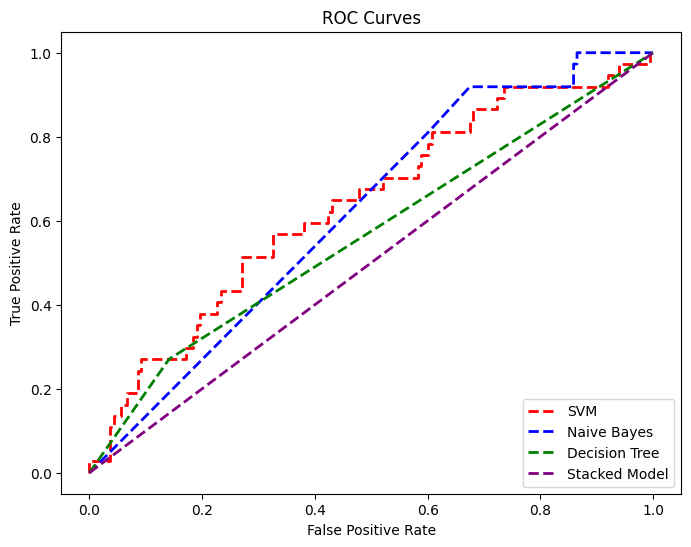

In [ ]:
stacking_acc = accuracy_score(y_test, res_stacking)
fpr_stacking, tpr_stacking, _ = roc_curve(y_test, res_stacking)
auc_stacking = roc_auc_score(y_test, res_stacking)

print('Доля правильных ответов для ансамбля моделей:', stacking_acc)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, linestyle='--', label='SVM')
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, linestyle='--', label='Naive Bayes')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, linestyle='--', label='Decision Tree')
plt.plot(fpr_stacking, tpr_stacking, color='purple', lw=2, linestyle='--', label='Stacked Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

#### Бэггинг

In [ ]:
from sklearn.ensemble import BaggingClassifier

estimator =  DecisionTreeClassifier()
bagging_model = BaggingClassifier(
    estimator=estimator,
    n_estimators=15,
    max_samples=0.8,           # доля выборки для каждой модели
    random_state=42
)
bagging_model.fit(X_train, y_train)
res_bagging = bagging_model.predict(X_test)

Оценим качество работы этого классификатора:

Доля правильных ответов для ансамбля моделей: 0.825


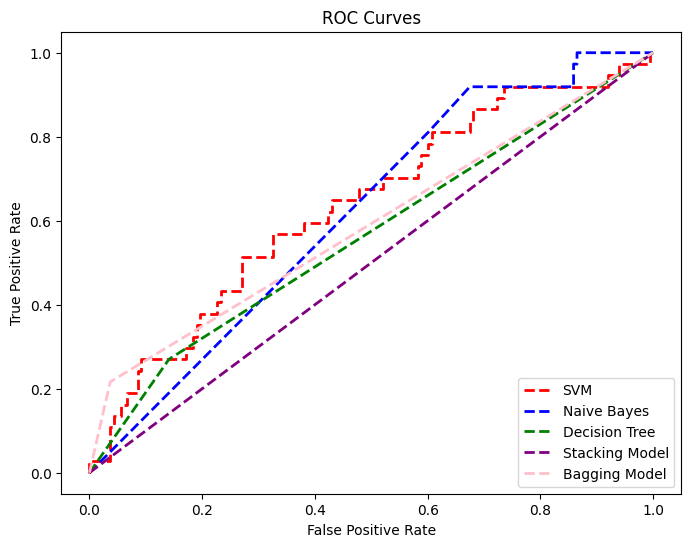

In [ ]:
bagging_acc = accuracy_score(y_test, res_bagging)
fpr_bagging, tpr_bagging, _ = roc_curve(y_test, res_bagging)
auc_bagging = roc_auc_score(y_test, res_bagging)

print('Доля правильных ответов для ансамбля моделей:', bagging_acc)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, linestyle='--', label='SVM')
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, linestyle='--', label='Naive Bayes')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, linestyle='--', label='Decision Tree')
plt.plot(fpr_stacking, tpr_stacking, color='purple', lw=2, linestyle='--', label='Stacking Model')
plt.plot(fpr_bagging, tpr_bagging, color='pink', lw=2, linestyle='--', label='Bagging Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

#### Бустинг

In [ ]:
from xgboost import XGBClassifier


boosting_model = XGBClassifier(
    n_estimators=15,
    learning_rate=0.5,
    max_depth=4,
    use_label_encoder=False,
    random_state=42
)

boosting_model.fit(X_train, y_train)
res_boosting = boosting_model.predict(X_test)

Оценим качество работы этого классификатора:

Доля правильных ответов для ансамбля моделей: 0.815


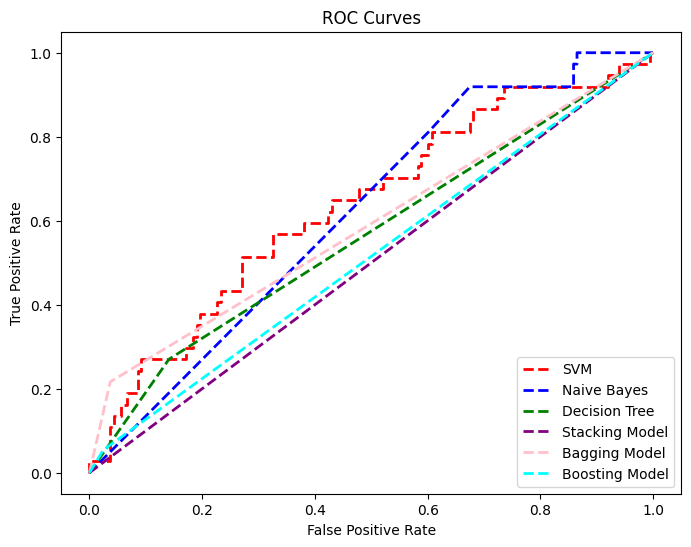

In [ ]:
boosting_acc = accuracy_score(y_test, res_boosting)
fpr_boosting, tpr_boosting, _ = roc_curve(y_test, res_boosting)
auc_boosting = roc_auc_score(y_test, res_boosting)

print('Доля правильных ответов для ансамбля моделей:', stacking_acc)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, linestyle='--', label='SVM')
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, linestyle='--', label='Naive Bayes')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, linestyle='--', label='Decision Tree')
plt.plot(fpr_stacking, tpr_stacking, color='purple', lw=2, linestyle='--', label='Stacking Model')
plt.plot(fpr_bagging, tpr_bagging, color='pink', lw=2, linestyle='--', label='Bagging Model')
plt.plot(fpr_boosting, tpr_boosting, color='cyan', lw=2, linestyle='--', label='Boosting Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()